In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot dCNN model fits to V1

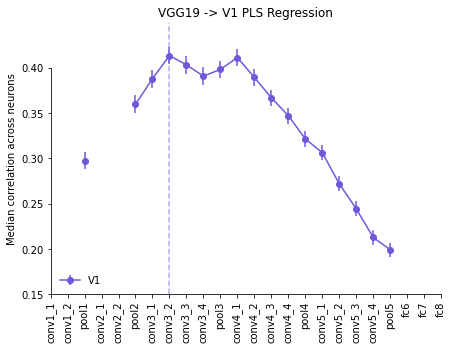

In [16]:
def nans(shape):
    arr = np.zeros(shape)
    arr.fill(np.nan)
    return arr

def load_results(filepath, layers):
    '''
    load_results loads up the cross-validated r2 results for all layers and returns a dictionary of IT and V4 accuracy.
    
    Arguments:
     - filepath is a string containing the path to the pickle file containing the result where the layer and variation level is bracketed out, 
            e.g. 'model_neural_pls_fits/{}-fit_1-iterations_5-components_{}.pickle'
     - layers is a list containing all the layers you want to load results for:
            e.g. ['conv1_1', 'conv1_2', 'pool1']      
     - ver is a string indicating which variation level (V0, V3, or V6)
     - 
    '''
    SE = lambda x: np.std(x)/np.sqrt(np.array(x).size)
    out = {'layers':layers}
    out['V1_acc'], out['V1_se'] = nans((len(layers),2)), nans((len(layers),2))
    for li, layer in enumerate(layers):
        if os.path.isfile(filepath.format(layer)):
            results = np.load(filepath.format(layer), allow_pickle=True)

            out['V1_acc'][li,:] = [np.median(results['v1_test']), np.median(results['v1_train'])]
            out['V1_se'][li,:] = [SE(results['v1_test']), SE(results['v1_train'])]
    return out

def plot_results(layers, areas=['V1'], plotTrain=0):
    fig,ax = plt.subplots(figsize=(7,5))
    colors = sns.hls_palette(8,h=.7)

    results = load_results('model_fits/V1_vgg19_{}-fit_5-components.pickle', layers=layers)
    for ai, area in enumerate(areas):
        thisAcc, thisSE = results[f'{area}_acc'], results[f'{area}_se']
        color = colors[ai]
        ax.errorbar(np.arange(len(layers)), thisAcc[:,plotTrain], yerr=thisSE[:,plotTrain], fmt='o-', 
                    color=color, label=area)
        if not np.all(np.isnan(thisAcc[:,plotTrain])):
            ax.axvline(np.nanargmax(thisAcc[:, plotTrain]), color=color, ls='--', alpha=0.5, label='_ignore')

    ax.legend(frameon=False, loc='lower left')
    ax.set_xticks(np.arange(len(layers)))
    ax.set_xticklabels(layers, rotation=90)
    ax.set_title(f'VGG19 -> V1 PLS Regression')
    ax.set_ylabel('Median correlation across neurons')
    ax.set_ylim([0.15, 0.45])
    sns.despine(trim=True)
    

# load and plot results 
layers = ['conv1_1', 'conv1_2', 'pool1', 'conv2_1', 'conv2_2', 'pool2', 'conv3_1', 'conv3_2', 'conv3_3', 'conv3_4', 'pool3', 
          'conv4_1', 'conv4_2', 'conv4_3', 'conv4_4', 'pool4', 'conv5_1', 'conv5_2', 'conv5_3', 'conv5_4', 'pool5', 
          'fc6', 'fc7', 'fc8']

plot_results(layers)

# Plot dCNN model fits to IT and V4

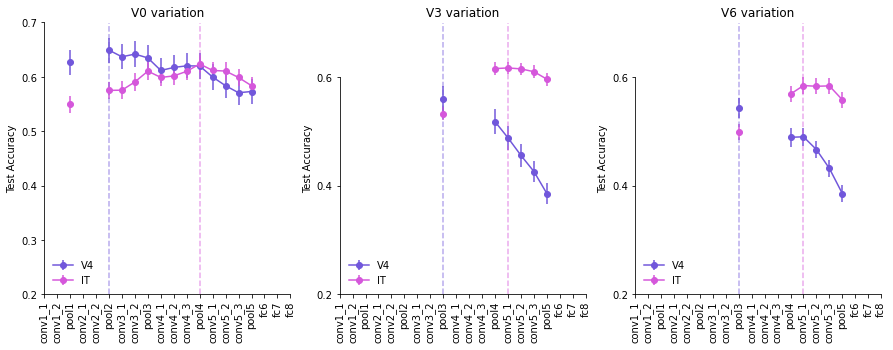

In [2]:
def nans(shape):
    arr = np.zeros(shape)
    arr.fill(np.nan)
    return arr

def load_results(filepath, layers, ver):
    '''
    load_results loads up the cross-validated r2 results for all layers and returns a dictionary of IT and V4 accuracy.
    
    Arguments:
     - filepath is a string containing the path to the pickle file containing the result where the layer and variation level is bracketed out, 
            e.g. 'model_neural_pls_fits/{}-fit_1-iterations_5-components_{}.pickle'
     - layers is a list containing all the layers you want to load results for:
            e.g. ['conv1_1', 'conv1_2', 'pool1']      
     - ver is a string indicating which variation level (V0, V3, or V6)
     - 
    '''
    SE = lambda x: np.std(x)/np.sqrt(np.array(x).size)
    out = {'layers':layers}
    out['IT_acc'], out['IT_se'] = nans((len(layers),2)), nans((len(layers),2))
    out['V4_acc'], out['V4_se'] = nans((len(layers),2)), nans((len(layers),2))
    for li, layer in enumerate(layers):
        if os.path.isfile(filepath.format(layer, ver)):
            results = np.load(filepath.format(layer, ver), allow_pickle=True)

            out['IT_acc'][li,:] = [np.median(results['it_test']), np.median(results['it_train'])]
            out['IT_se'][li,:] = [SE(results['it_test']), SE(results['it_train'])]
            out['V4_acc'][li,:] = [np.median(results['v4_test']), np.median(results['v4_train'])]
            out['V4_se'][li,:] = [SE(results['v4_test']), SE(results['v4_train'])]
    return out

def plot_results(vers, layers, areas=['V4', 'IT'], plotTrain=0):
    fig,axes = plt.subplots(1,len(vers), figsize=(15,5))
    results = {}
    #sns.set_palette(sns.hls_palette(8,7))

    colors = sns.hls_palette(8,h=.7)
    for vi,ver in enumerate(vers):
        ax = axes[vi]
        results[ver] = load_results('model_fits/vgg19_{}-fit_5-components_{}.pickle', layers=layers, ver=ver)
        for ai, area in enumerate(areas):
            thisAcc, thisSE = results[ver][f'{area}_acc'], results[ver][f'{area}_se']
            color = colors[ai]
            ax.errorbar(np.arange(len(layers)), thisAcc[:,plotTrain], yerr=thisSE[:,plotTrain], fmt='o-', 
                        color=color, label=area)
            if not np.all(np.isnan(thisAcc[:,plotTrain])):
                ax.axvline(np.nanargmax(thisAcc[:, plotTrain]), color=color, ls='--', alpha=0.5, label='_ignore')

        ax.legend(frameon=False, loc='lower left')
        ax.set_xticks(np.arange(len(layers)))
        ax.set_xticklabels(layers, rotation=90)
        ax.set_title(f'{ver} variation')
        ax.set_ylabel('Test Accuracy')
        ax.set_ylim([0.2, 0.7])
        sns.despine(trim=True)
    

# load and plot results 
layers = ['conv1_1', 'conv1_2', 'pool1', 'conv2_1', 'conv2_2', 'pool2', 'conv3_1', 'conv3_2', 'pool3', 
          'conv4_1', 'conv4_2', 'conv4_3', 'pool4', 'conv5_1', 'conv5_2', 'conv5_3', 'pool5', 'fc6', 'fc7', 'fc8']
vers = ['V0', 'V3', 'V6']

plot_results(vers, layers)

# Get response of "model IT neurons" 

In [12]:

def load_fit_weights(filepath, layer, ver='all'):
    out = {}
    if os.path.isfile(filepath.format(layer, ver)):
        results = np.load(filepath.format(layer, ver), allow_pickle=True)
        out['IT'] = np.array(results['it_weights']).squeeze()
        out['V4'] = np.array(results['v4_weights']).squeeze()
    return out

filepath = 'model_fits/vgg19_{}-fit_5-components_{}.pickle'
weights = load_fit_weights(filepath, layer='pool4', ver='V0')

In [13]:
from IT_neural_fit import get_model
from pt_synthesize import *


In [14]:

model = get_model('pool4').to(device)
img = image_loader('/home/gru/akshay/textures/input/leopard.jpg').to(device)
resp = model(img)
resp = resp.view(resp.shape[0], -1)


In [16]:
W = torch.from_numpy(weights['IT'].T).to(device)
X = torch.matmul(resp.float(), W.float())

# Run Image synthesis for neural population control (Bashivan et al., Science)

In [1]:
from synthesize import *
from PIL import ImageOps
import matplotlib.pyplot as plt

In [73]:
LAYER = 'pool4'
AREA = 'IT'
VER='V6'
TV_WEIGHT=1e-1
TV_WEIGHT_STR= f'{TV_WEIGHT:.0e}'.replace('+', '')
INPUT_IMAGE_PATH = '/home/gru/akshay/textures/input/leopard.jpg'

input_image = image_loader(INPUT_IMAGE_PATH).to(device)

outputs = []
neuron_ids = np.random.randint(0,168, size=(10,))
for i in range(5):
    print(f'---Generating maximally exciting image for Neuron {neuron_ids[i]+1}---')
    init_image = torch.randn(input_image.data.size(), device=device)
    output_image = run_synthesis(LAYER, input_image, init_image, num_steps=1000, area = AREA, ver=VER, tv_weight = TV_WEIGHT, loss_func = SynthesisLoss3, neuron_id=neuron_ids[i])
    outputs.append(output_image)


---Generating maximally exciting image for Neuron 53---
(run_synthesis) Building the style transfer model.
(run_syntheiss) Beginning optimization for image synthesis.
Step #100 synth loss: -1.784385323524475
Step #200 synth loss: -2.2553672790527344
Step #300 synth loss: -2.5254619121551514
Step #400 synth loss: -2.6461145877838135
Step #500 synth loss: -2.735537052154541
Step #600 synth loss: -2.800814628601074
Step #700 synth loss: -2.84505558013916
Step #800 synth loss: -2.8835010528564453
Step #900 synth loss: -2.9131317138671875
Step #1000 synth loss: -2.9345035552978516
---Generating maximally exciting image for Neuron 7---
(run_synthesis) Building the style transfer model.
(run_syntheiss) Beginning optimization for image synthesis.
Step #100 synth loss: -17.307266235351562
Step #200 synth loss: -20.35508155822754
Step #300 synth loss: -21.779541015625
Step #400 synth loss: -22.740549087524414
Step #500 synth loss: -23.421916961669922
Step #600 synth loss: -23.944677352905273
Ste

In [ ]:
fig, axes = plt.subplots(1,len(outputs),figsize=(20,5))
for i in range(len(outputs)):
    axes[i].imshow(imsave(outputs[i]))
    axes[i].set_title(f'Maximizes neuron {neuron_ids[i]+1}')
    axes[i].axis('off')

In [39]:
SAVEDIR='/home/gru/akshay/synthesis/figures'

fig.savefig(f'{SAVEDIR}/MEI_{LAYER}-{AREA}-{VER}_{len(outputs)}neurons_tv{TV_WEIGHT_STR}_ex1.png')

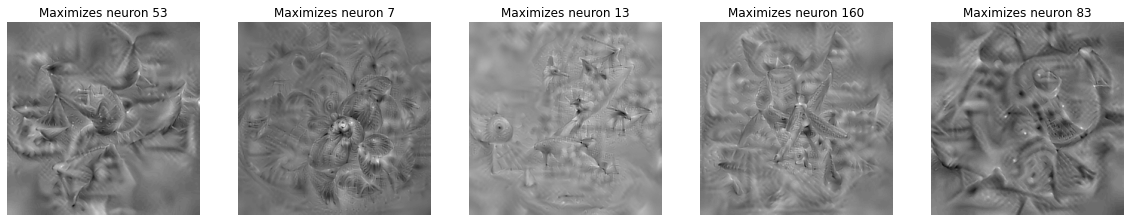

In [74]:
fig, axes = plt.subplots(1,len(outputs),figsize=(20,5))
for i in range(len(outputs)):
    axes[i].imshow(ImageOps.grayscale(imsave(outputs[i])), cmap='gray')
    axes[i].set_title(f'Maximizes neuron {neuron_ids[i]+1}')
    axes[i].axis('off')

fig.savefig(f'{SAVEDIR}/MEI_{LAYER}-{AREA}-{VER}_{len(outputs)}neurons_tv{TV_WEIGHT_STR}_gray_ex2.png')

# Run image synthesis for neural dimensions

In [41]:
from synthesize import *
import matplotlib.pyplot as plt
rand_vec = torch.randn([1,168], device=device)


In [42]:
LAYER = 'pool4'
AREA = 'IT'
VER='V6'
TV_WEIGHT = 1e-2
TV_WEIGHT_STR= f'{TV_WEIGHT:.0e}'.replace('+', '')

INPUT_IMAGE_PATH = '/home/gru/akshay/textures/input/elephant1.jpg'

input_image = image_loader(INPUT_IMAGE_PATH).to(device)

outputs = []

mags = np.linspace(-1.5,1.5,13)
for i in range(len(mags)):
    print(f'---{i+1}---')
    init_image = torch.randn(input_image.data.size(), device=device)
    output_image = run_synthesis(LAYER, input_image, init_image, num_steps=1000, area = AREA, ver=VER, tv_weight = TV_WEIGHT,
                                 loss_func = SynthesisLoss2, rand_vec=rand_vec, vec_mag=mags[i]);
    outputs.append(output_image)


(run_synthesis) Building the style transfer model.
(run_syntheiss) Beginning optimization for image synthesis.
Step #100 synth loss: 1.1956000328063965
Step #200 synth loss: 1.0642164945602417
Step #300 synth loss: 1.010191559791565
Step #400 synth loss: 0.9812774658203125
Step #500 synth loss: 0.9633051753044128
Step #600 synth loss: 0.9487740993499756
Step #700 synth loss: 0.9375844597816467
Step #800 synth loss: 0.9280462265014648
Step #900 synth loss: 0.9201536774635315
Step #1000 synth loss: 0.9140481948852539
(run_synthesis) Building the style transfer model.
(run_syntheiss) Beginning optimization for image synthesis.
Step #100 synth loss: 0.7831071615219116
Step #200 synth loss: 0.6874322295188904
Step #300 synth loss: 0.649262011051178
Step #400 synth loss: 0.6297464370727539
Step #500 synth loss: 0.6166443228721619
Step #600 synth loss: 0.6081219911575317
Step #700 synth loss: 0.6010156869888306
Step #800 synth loss: 0.5957599878311157
Step #900 synth loss: 0.5920189023017883


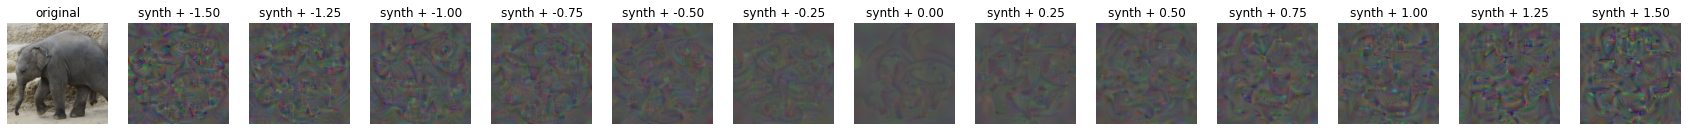

In [44]:
fig, axes = plt.subplots(1,len(outputs)+1,figsize=(30,5))
axes[0].imshow(imsave(input_image))
axes[0].axis('off');
axes[0].set_title('original')
for i in range(len(outputs)):
    axes[i+1].imshow(imsave(outputs[i]))
    axes[i+1].axis('off')
    axes[i+1].set_title(f'synth + {mags[i]:.2f}')
fig.savefig(f'/home/gru/akshay/synthesis/figures/neuraldims_elephant_{LAYER}-{AREA}-{VER}_ex1.png', bbox_inches='tight')

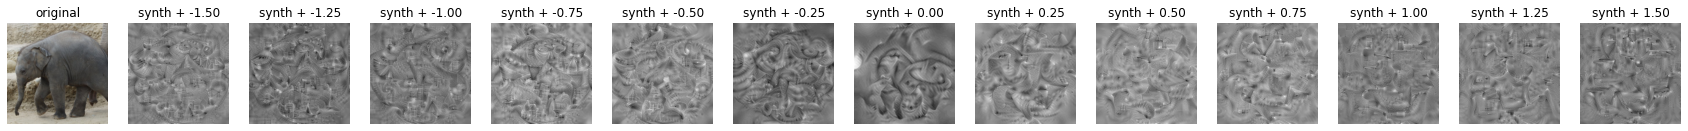

In [47]:
fig, axes = plt.subplots(1,len(outputs)+1,figsize=(30,5))
axes[0].imshow(imsave(input_image))
axes[0].axis('off');
axes[0].set_title('original')
for i in range(len(outputs)):
    axes[i+1].imshow(ImageOps.grayscale(imsave(outputs[i])), cmap='gray')
    axes[i+1].axis('off')
    axes[i+1].set_title(f'synth + {mags[i]:.2f}')
fig.savefig(f'/home/gru/akshay/synthesis/figures/neuraldims_elephant_{LAYER}-{AREA}-{VER}_gray_ex1.png', bbox_inches='tight', dpi=300)

In [68]:
1+1

2

# Approach 3: interpolate between two images

In [1]:
from synthesize import *
import matplotlib.pyplot as plt

cpu


/home/gru/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [92]:
# Plotting and saving functions.
def imsave(tensor, savepath=None,  grayscale=True):
    unloader = transforms.ToPILImage()  # reconvert into PIL image

    image = tensor.cpu().clone()
    image = image.squeeze(0)
    image = unloader(image)
    if grayscale==True:
        image = ImageOps.grayscale(image)
    if savepath is not None:
        image.save(savepath)
    return image

In [116]:
import skimage.io

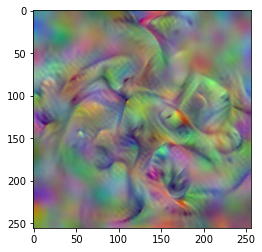

In [149]:
im = imsave(outputs[0], grayscale=False)
x = np.array(im)
x = x-58
x = np.rint(x*(255/np.max(x))).astype(int)
x
plt.imshow(x)

device(type='cuda')

In [151]:
LAYER = 'pool4'
VER='V6'
AREA='IT'
INPUT_IMAGE_DIR = '/home/gru/akshay/textures/input'
uid='t0'
save_path = '/home/gru/akshay/synthesis/neurint'

TV_WEIGHT=1e-2
TV_WEIGHT_STR= f'{TV_WEIGHT:.0e}'.replace('+', '')

image1_name = 'elephant1'
image2_name = 'face1'

image1 = image_loader(f'{INPUT_IMAGE_DIR}/{image1_name}.jpg').to(device)
image2 = image_loader(f'{INPUT_IMAGE_DIR}/{image2_name}.jpg').to(device)

outputs = []

intervals = np.linspace(0,1,5)
for i in range(len(intervals)):
    print(f'~~~Iteration {i+1}~~~')
    init_image = torch.randn(image1.data.size(), device=device)
    output_image = run_synthesis(LAYER, image1, init_image, num_steps=1000, area = AREA, ver=VER, tv_weight=TV_WEIGHT,
                                 loss_func = SynthesisLoss4, vec_mag=intervals[i], interpol_image=image2);
    if save_path is not None:
        savename = f'{save_path}/{image1_name}_{image2_name}_{int(100*intervals[i])}_{LAYER}-{AREA}_{uid}.png'
        output = imsave(output_image, savepath=savename, grayscale=True)
    outputs.append(output_image)


~~~Iteration 1~~~
(run_synthesis) Building the style transfer model.
(run_syntheiss) Beginning optimization for image synthesis.
Step #100 synth loss: 0.05777423828840256
Step #200 synth loss: 0.04649939015507698


KeyboardInterrupt: 

tensor([[[[0.2804, 0.2806, 0.2810,  ..., 0.2844, 0.2837, 0.2833],
          [0.2794, 0.2797, 0.2802,  ..., 0.2853, 0.2846, 0.2843],
          [0.2778, 0.2782, 0.2789,  ..., 0.2872, 0.2865, 0.2862],
          ...,
          [0.3115, 0.3116, 0.3117,  ..., 0.3245, 0.3249, 0.3252],
          [0.3106, 0.3108, 0.3110,  ..., 0.3254, 0.3260, 0.3264],
          [0.3102, 0.3103, 0.3106,  ..., 0.3259, 0.3266, 0.3270]],

         [[0.3291, 0.3293, 0.3296,  ..., 0.3168, 0.3176, 0.3181],
          [0.3286, 0.3288, 0.3292,  ..., 0.3166, 0.3174, 0.3179],
          [0.3279, 0.3280, 0.3285,  ..., 0.3163, 0.3172, 0.3176],
          ...,
          [0.3365, 0.3368, 0.3373,  ..., 0.2887, 0.2890, 0.2893],
          [0.3348, 0.3351, 0.3356,  ..., 0.2885, 0.2890, 0.2893],
          [0.3338, 0.3341, 0.3347,  ..., 0.2885, 0.2890, 0.2894]],

         [[0.3353, 0.3350, 0.3345,  ..., 0.3181, 0.3189, 0.3192],
          [0.3360, 0.3356, 0.3351,  ..., 0.3182, 0.3189, 0.3193],
          [0.3372, 0.3368, 0.3362,  ..., 0

In [80]:
x = np.linspace(0,1,7)
int(100*x[1])

16

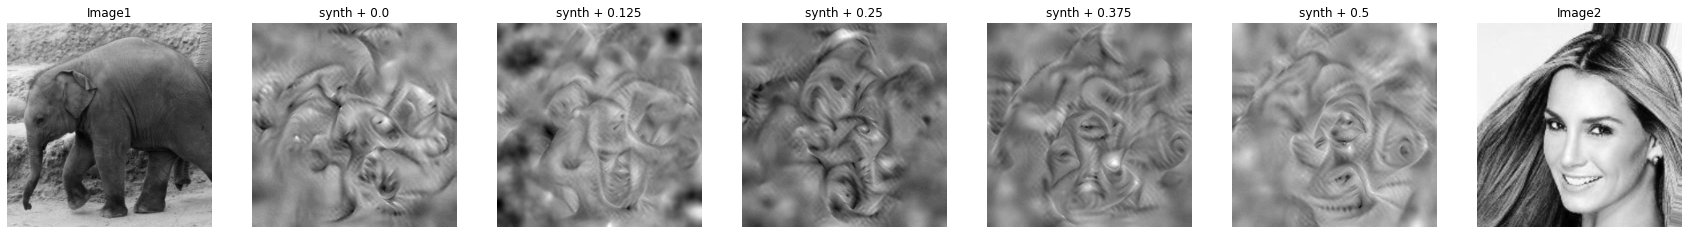

In [90]:
fig, axes = plt.subplots(1,len(outputs)+2,figsize=(30,5))
axes[0].imshow(imsave(image1), cmap='gray');
axes[0].axis('off');
axes[0].set_title('Image1')
for i in range(len(outputs)):
    axes[i+1].imshow(ImageOps.grayscale(imsave(outputs[i])), cmap='gray')
    axes[i+1].axis('off')
    axes[i+1].set_title(f'synth + {mags[i]}')

axes[-1].imshow(imsave(image2), cmap='gray')
axes[-1].axis('off');
axes[-1].set_title('Image2')

fig.savefig(f'/home/gru/akshay/synthesis/neurint/neuralinterpol_{LAYER}-{AREA}-{VER}_tv{TV_WEIGHT_STR}_L1_gray_t0.png', bbox_inches='tight', dpi=300)

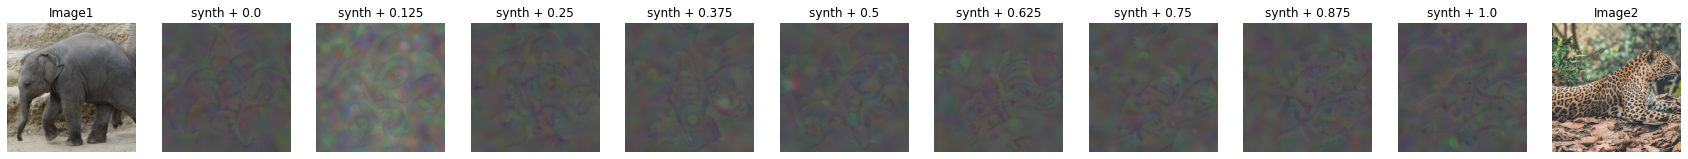

In [67]:
fig, axes = plt.subplots(1,len(outputs)+2,figsize=(30,5))
axes[0].imshow(imsave(image1))
axes[0].axis('off');
axes[0].set_title('Image1')
for i in range(len(outputs)):
    axes[i+1].imshow(imsave(outputs[i]))
    axes[i+1].axis('off')
    axes[i+1].set_title(f'synth + {mags[i]}')

axes[-1].imshow(imsave(image2))
axes[-1].axis('off');
axes[-1].set_title('Image2')

fig.savefig(f'/home/gru/akshay/synthesis/figures/neuralinterpol_{LAYER}-{AREA}-{VER}_tv{TV_WEIGHT_STR}_L1_smp1.png', bbox_inches='tight', dpi=300)

In [ ]:
fig, axes = plt.subplots(1,len(outputs)+2,figsize=(30,5))
axes[0].imshow(imsave(image1))
axes[0].axis('off');
axes[0].set_title('Image1')
for i in range(len(outputs)):
    axes[i+1].imshow(imsave(outputs[i]))
    axes[i+1].axis('off')
    axes[i+1].set_title(f'synth + {mags[i]}')

axes[-1].imshow(imsave(image2))
axes[-1].axis('off');
axes[-1].set_title('Image2')

fig.savefig(f'/home/gru/akshay/synthesis/figures/neuralinterpol_{LAYER}-{AREA}-{VER}_tv{TV_WEIGHT_STR}_L1_smp1.png', bbox_inches='tight', dpi=300)